<a href="https://colab.research.google.com/github/stock-code/StockMarketAnalysis/blob/main/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Starter file for HW6
## enter your name and umbc username here:

**name:Shubham Mansukhbhai Gajera**   

**umbc username:SY28410**  

This is a stub for your notebook to use TensorFlow to train a simple feed-forward multi-layer perceptron neural netwrk using the big zoo database of HW5.  You will have to preprocess the data to make it suitable for a MLP learner.  This can be done by changing the CSV file in your repo or in the TensorFlow notebook or in a combination of both.

When you have a working notebook, be sure to save it. If you are running it on colab, you will have to dounload the notebook and then copy it into your repository.

You can experiment with the notebook **wine_example.ipynb** which is in your repo. Step thought it, reading the comments and reviewing the output. To fully understand it, you may want to make some changes or add new cell to experiment with it. You can use this as a model to help you figure out how to complete this notebook.

You can run this notebook on your local computer or on colab, but on colab, you must to an extra step of upload your file to colab.  It will only be there while your session on colab continues.  If you stop and return a few hours later, you will have to upload it again.

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

### 1 Get the data

We load the file slightly differently if we are running on colab or our local computer. This will set the variable **IN_COLAB** to True iff we are running on colab.

In [12]:
try:
    import google.colab
    IN_COLAB = True
    print("Running in colab")
except:
    IN_COLAB = False
    print("Not running in colab")

Running in colab


This is the name of the file that has our data.  Edit it as appropriate.

In [73]:
data_file_name = "myzoo.csv"

This will ask your to upload the file if you are using colab and requires navigating to and clicking on the file.  Note that the file will eventually be deleted from the colab server you are running on when your session ends. The session will end if you completely disconnect or are inactive for too long a time.

In [80]:
if IN_COLAB:
    if os.path.exists(data_file_name):
        print("Deleting prior version of", data_file_name)
        os.remove(data_file_name)
    import io
    from google.colab import files
    print("When asked to select your file, find and click on", data_file_name)
    uploaded = files.upload()
    the_file = io.BytesIO(uploaded[data_file_name])
else:
    the_file = data_file_name

Deleting prior version of myzoo.csv
When asked to select your file, find and click on myzoo.csv


Saving myzoo.csv to myzoo.csv


The numpy function [genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) is any easy way to import data from a file.

In [85]:
import pandas as pd

# Read the CSV into a pandas data frame (df)
#   With a df you can do many things
#   most important: visualize data with Seaborn
data = pd.read_csv("myzoo.csv", sep=',').to_numpy()
print(data)

[[0 1 1 ... 0 1 'bird']
 [0 0 1 ... 0 0 'insect']
 [0 1 1 ... 0 0 'bird']
 ...
 [0 0 1 ... 0 0 'amphibian']
 [0 0 1 ... 0 0 'amphibian']
 [0 0 1 ... 0 0 'reptile']]


**X** should be be the array without the answer column and **y** will be a vector of the answers

In [87]:
print("your code for extracting **X** and **y** from the numpy array **data**")
X=data[:,:-1]
y=data[:,-1]

print(f"X.shape={X.shape}; y.shape={y.shape}")

your code for extracting **X** and **y** from the numpy array **data**
X.shape=(213, 16); y.shape=(213,)


### 2 Preprocess the data

We typically need to do some preprocessing (e.g., scaling) of the data to make it work better with our machine learning system

In [88]:
print("do any neccessary encoding here that you've not done directly on the csv file")
print(f"Initial unique y values = {np.unique(y)}")
y = LabelEncoder().fit_transform(y)
print(f"After encoding, unique y values = {np.unique(y)}")

do any neccessary encoding here that you've not done directly on the csv file
Initial unique y values = ['amphibian' 'bird' 'fish' 'insect' 'invertebrate' 'mammal' 'reptile']
After encoding, unique y values = [0 1 2 3 4 5 6]


We'll use the variables num_features and num_classes later when we define the TF model

In [89]:
# replace the pass expressions with expressions to get the right values from X and y
num_features = X.shape[1]
num_classes = len(set(y))
print(f"num_features={num_features}; num_classes={num_classes}")

num_features=16; num_classes=7


### 3 Build the model

Using Keras makes constructing a neural network model easy. 

TensofrFlow remembers the model parameter's weights if we run it repeateldly while debugging.  Calling the clear_session() function will reset the model parameters.  It's good to do this each time you change anything.

In [112]:
tf.keras.backend.clear_session()

You must choose how many layers to have and how big each will be.  The first layer should note the expected input size as the number of features and the size of the last one should be the number of classes. You'll have to experiment a bit to choose how many layers and what sizes they are.

Calling model.summary will print a description of the model so we can confirm it looks ok.

In [113]:
model = tf.keras.models.Sequential([
  layers.Dense(16, input_shape=(num_features,), activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(num_classes, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 7)                 119       
                                                                 
Total params: 935
Trainable params: 935
Non-trainable params: 0
_________________________________________________________________


### 4 Compile the Keras model into a neural network 

This step produces the actual network structure and lets us specify addional parameters. These are typical parameter values for optimiser and metrics.  The loss function *sparse_categorical_crossentropy* is one that's good for a multiclass problem.

In [114]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("compiled, ready to train")

compiled, ready to train


### 5 Train the model

TensorFlow's callback mechansim lets us add several extras.  This [**EarlyStopping**](https://keras.io/api/callbacks/early_stopping/) callback will stop training when the loss on the validation data does not improve for some number of successive training epochs. Experiment with different values for **patience_value** to get good results w/o overfitting.

In [115]:
patience_value = 5
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = patience_value)

We train the model with a validation_split that holds out a fraction of the data as test data and captures the accuracy of the main training data and this validation data after each eopch.  Experiment with different values for **split_value** to find one that gives good results, e.g., try 0.1, 0.2, 0.3,

The fit( ) method returns a history object which records useful information about the model's training.  We'll examine it after we train

In [116]:
split_value = 0.3
history = model.fit(X_scaled, y, verbose=0, epochs=900, validation_split = split_value, callbacks=[callback])
print(f"{len(history.history['loss'])} epochs run; final accuracy = {history.history['accuracy'][-1]}")

116 epochs run; final accuracy = 0.9932885766029358


### 6 Review the results, draw conclusions, and make adjustments

We plot the model accuracy and validation accuracy recorded in the history. **EarlyStopping** callback kicked in when the val_loss was not improving (i.e., getting lower) for several epochs.  This indicates that the model is beginning to overfit on the training data and it's time to stop training.

While an accuracy does not sound impressive, it is about as good as one can get with this data using any machine learning method without overfitting.  If you edit this notebook to trai/n on X rather than X_scaled, the accuracy is significantly lower, about 0.46.

We can plot the accuracy and validation accuracy for each epoch easily.

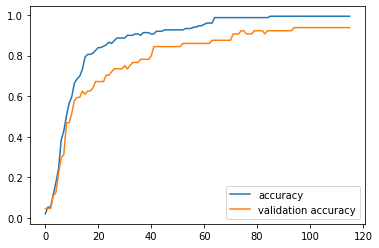

In [117]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])

We can also plot how the loss and val-loss vary during training.

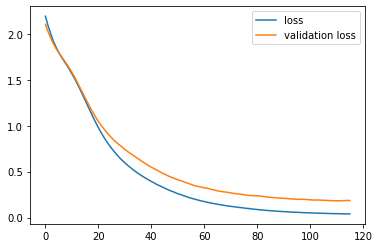

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','validation loss'])

### epilogue: confusion matrix

In [119]:
X = np.asarray(X).astype('float32')
print(tf.math.confusion_matrix(y, np.argmax(model.predict(X), axis=1)))

tf.Tensor(
[[12  0  0  0  0  0  3]
 [ 0 31  0  0  0  0  9]
 [ 0 13  0  0  0  0 15]
 [18  0  0  0  7  0  0]
 [10  0  0  0  3  0  7]
 [ 0  0  0  0  0 60  0]
 [ 1  0  0  0  0  0 24]], shape=(7, 7), dtype=int32)


### fin